1. Plot the target variable. Determine if the target variable seems appropriate or if any transformations should be made.

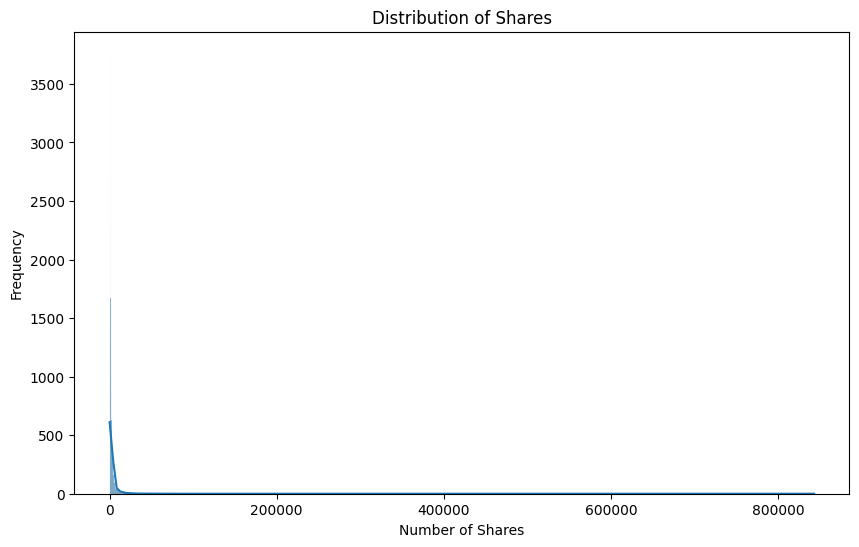

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/OnlineNewsPopularity.csv')
plt.figure(figsize=(10, 6))
sns.histplot(data[' shares'], kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Number of Shares')
plt.ylabel('Frequency')
plt.show()


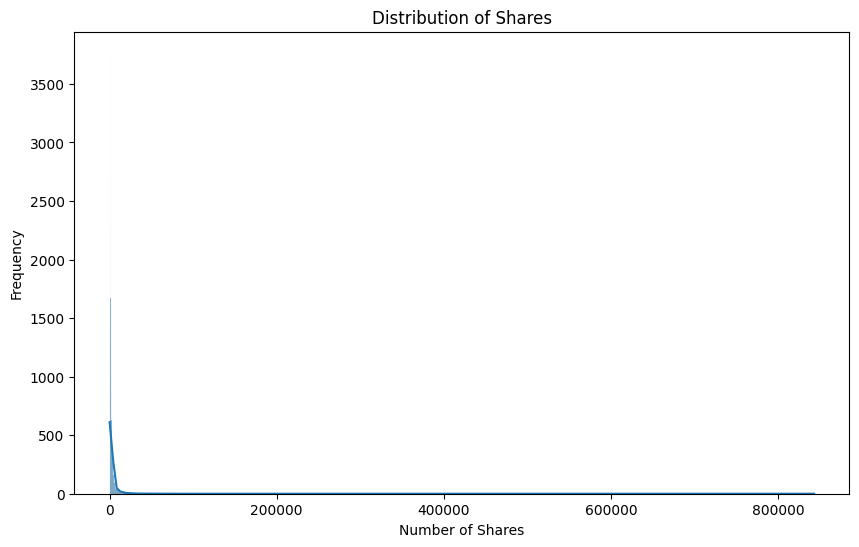

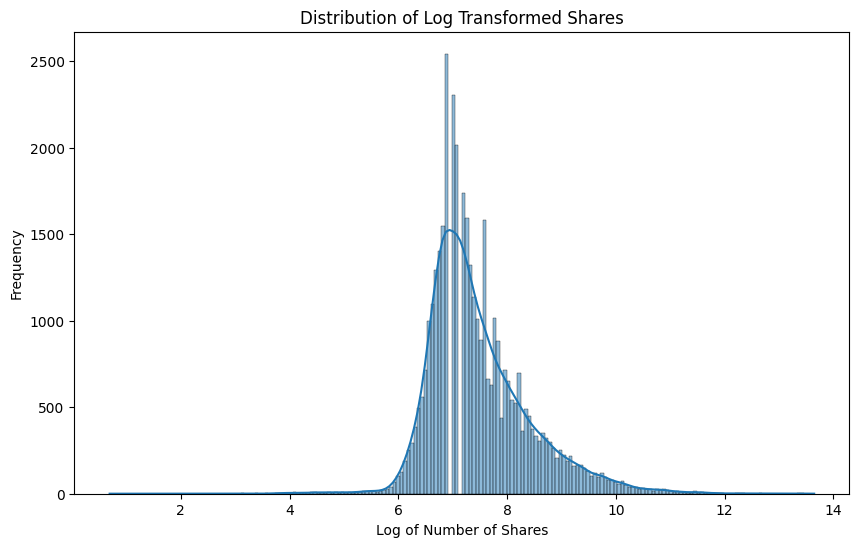

Original Skewness: 33.96388487571415
Transformed Skewness: 1.0264770065011177


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

file_path = '/content/OnlineNewsPopularity.csv'
data = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))
sns.histplot(data[' shares'], kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Number of Shares')
plt.ylabel('Frequency')
plt.show()

original_skewness = data[' shares'].skew()

data['log_shares'] = np.log(data[' shares'] + 1)

plt.figure(figsize=(10, 6))
sns.histplot(data['log_shares'], kde=True)
plt.title('Distribution of Log Transformed Shares')
plt.xlabel('Log of Number of Shares')
plt.ylabel('Frequency')
plt.show()

transformed_skewness = data['log_shares'].skew()

print("Original Skewness:", original_skewness)
print("Transformed Skewness:", transformed_skewness)


2. Build a linear regression model without any higher order terms and determine what predictors are most significant

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

X = data.drop([' shares', 'url', ' timedelta'], axis=1)  # Excluding non-predictive features
y = data[' shares']

linear_reg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': linear_reg.coef_})
significant_predictors = coefficients.reindex(coefficients.Coefficient.abs().sort_values(ascending=False).index)

print("MSE:", mse)
print("R2:", r2)
print("Top 10 Significant Predictors:\n", significant_predictors.head(10))

MSE: 87848018.55529006
R2: 0.2720089250223091
Top 10 Significant Predictors:
                         Feature    Coefficient
40                       LDA_03  502238.116470
39                       LDA_02  501983.938839
38                       LDA_01  501921.087830
41                       LDA_04  501297.751371
37                       LDA_00  500528.332559
58                   log_shares    6716.090371
44   global_rate_positive_words   -5718.241960
2               n_unique_tokens    2880.098306
14       data_channel_is_socmed   -1994.304983
43    global_sentiment_polarity    1712.545465


3. Build a regression tree and use important features to determine predictors that
are most significant.

In [24]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

X = data.drop([' shares', 'url', ' timedelta'], axis=1)  # Excluding non-predictive features
y = data[' shares']

linear_reg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_reg = DecisionTreeRegressor(random_state=42)

tree_reg.fit(X_train, y_train)

y_pred_tree = tree_reg.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': tree_reg.feature_importances_})
significant_tree_predictors = feature_importances.reindex(feature_importances.Importance.sort_values(ascending=False).index)

print("MSE Tree:", mse_tree)
print("R2 Tree:", r2_tree)
print("Top 10 Significant Tree Predictors:\n", significant_tree_predictors.head(10))


MSE Tree: 4688997.4004288055
R2 Tree: 0.9611425696988563
Top 10 Significant Tree Predictors:
                        Feature  Importance
58                  log_shares    0.980472
7                     num_imgs    0.012555
27   self_reference_max_shares    0.005894
42         global_subjectivity    0.000529
51       avg_negative_polarity    0.000337
56      abs_title_subjectivity    0.000082
25                  kw_avg_avg    0.000077
26   self_reference_min_shares    0.000025
50       max_positive_polarity    0.000007
2              n_unique_tokens    0.000004


4. Choose several significant features from steps 2 and 3 and create visualizations or tables that explore the relationships between the target and your selected features.

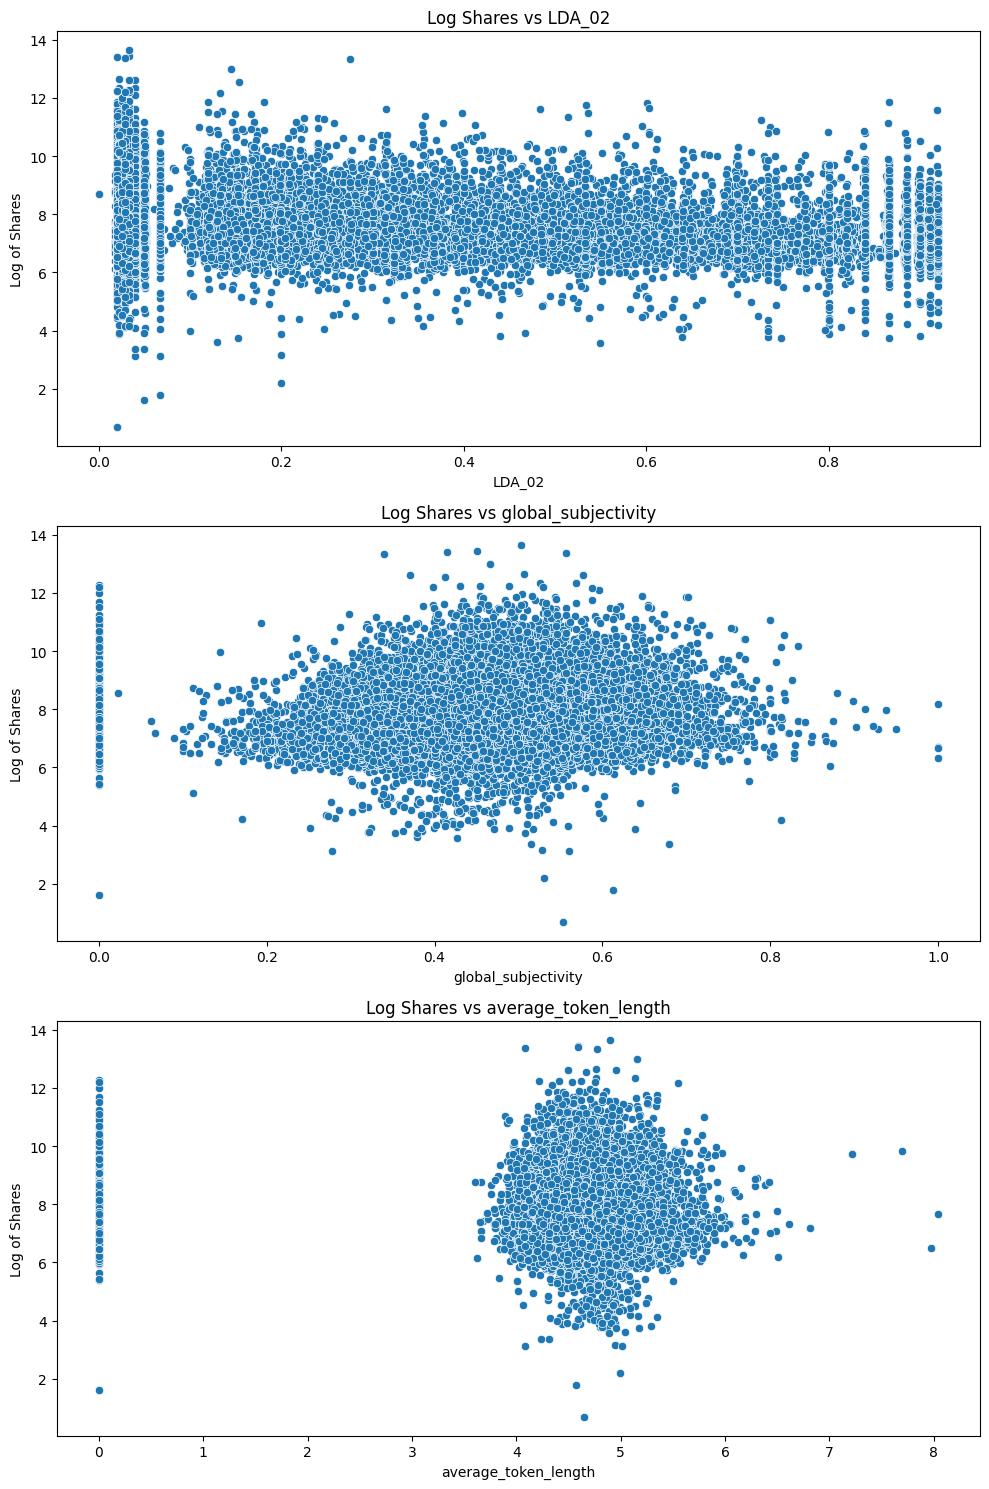

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


adjusted_features_to_visualize = [' LDA_02', ' global_subjectivity', ' average_token_length']

fig, axes = plt.subplots(nrows=len(adjusted_features_to_visualize), ncols=1, figsize=(10, 15))

for i, feature in enumerate(adjusted_features_to_visualize):
    sns.scatterplot(x=data[feature], y=data['log_shares'], ax=axes[i])
    axes[i].set_title(f'Log Shares vs {feature.strip()}')
    axes[i].set_xlabel(feature.strip())
    axes[i].set_ylabel('Log of Shares')

plt.tight_layout()
plt.show()



6. Use methods to remove insignifcant variables from the model

In [26]:
insignificant_cols = [
    ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_imgs', ' num_videos',
    ' average_token_length', ' num_keywords', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
]

X_train_refined = X_train.drop(insignificant_cols, axis=1)

model_refined = LinearRegression()
model_refined.fit(X_train_refined, y_train)

X_train_refined_sm = sm.add_constant(X_train_refined)
model_refined_sm = sm.OLS(y_train, X_train_refined_sm).fit()
print(model_refined_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     240.6
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        03:33:14   Log-Likelihood:            -3.3738e+05
No. Observations:               31715   AIC:                         6.749e+05
Df Residuals:                   31666   BIC:                         6.753e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [27]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

ridge_reg = Ridge(alpha=1.0, random_state=42)

ridge_reg.fit(X_train, y_train)

y_pred_ridge = ridge_reg.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

ridge_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge_reg.coef_})
significant_ridge_predictors = ridge_coefficients.reindex(ridge_coefficients.Coefficient.abs().sort_values(ascending=False).index)

print("MSE Ridge:", mse_ridge)
print("R2 Ridge:", r2_ridge)
print("Top 10 Significant Ridge Predictors:\n", significant_ridge_predictors.head(10))


MSE Ridge: 87847145.1824171
R2 Ridge: 0.2720161626090766
Top 10 Significant Ridge Predictors:
                         Feature  Coefficient
58                   log_shares  6715.927833
44   global_rate_positive_words -4237.302979
2               n_unique_tokens  2730.756785
14       data_channel_is_socmed -1991.904966
3              n_non_stop_words -1770.468286
43    global_sentiment_polarity  1535.142770
15         data_channel_is_tech -1505.522208
48        avg_positive_polarity -1250.010297
45   global_rate_negative_words -1126.753829
37                       LDA_00 -1069.052665


**Linear Regression Modeling:** Build and tune a linear regression model that has
high predictive power and can be used to explain to Mashable what features are most important in influencing the number of shares.

In [28]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

main_predictors = [' n_tokens_content', ' num_hrefs', ' num_imgs', ' average_token_length']

# features (up to degree 2) for these predictors
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(data[main_predictors])

# Creating a new DataFrame with the polynomial features
poly_feature_names = poly.get_feature_names_out(main_predictors)
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)

data_with_poly = pd.concat([data, X_poly_df], axis=1)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(data_with_poly.drop(columns=['url', ' timedelta', ' shares', 'log_shares']), data_with_poly['log_shares'], test_size=0.2, random_state=42)


In [29]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# LASSO model with cross-validation to find the best alpha
lasso_cv = LassoCV(alphas=None, cv=5, max_iter=100000, random_state=42)

lasso_cv.fit(X_train_poly, y_train_poly)

optimal_alpha = lasso_cv.alpha_

y_pred_lasso = lasso_cv.predict(X_test_poly)

mse_lasso = mean_squared_error(y_test_poly, y_pred_lasso)
r2_lasso = r2_score(y_test_poly, y_pred_lasso)

lasso_coefficients = pd.DataFrame({'Feature': X_train_poly.columns, 'Coefficient': lasso_cv.coef_})
significant_lasso_predictors = lasso_coefficients[lasso_coefficients['Coefficient'] != 0].sort_values(by='Coefficient', ascending=False)

print("Optimal Alpha:", optimal_alpha)
print("MSE LASSO:", mse_lasso)
print("R2 LASSO:", r2_lasso)
print("Top 10 Significant LASSO Predictors:\n", significant_lasso_predictors.head(10))


Optimal Alpha: 45.93990765475909
MSE LASSO: 0.7891231025688554
R2 LASSO: 0.07942395832624649
Top 10 Significant LASSO Predictors:
                          Feature   Coefficient
25                    kw_avg_avg  1.991578e-04
63   n_tokens_content  num_hrefs  2.837441e-06
26     self_reference_min_shares  1.953076e-06
28    self_reference_avg_sharess  1.065278e-06
27     self_reference_max_shares  1.857796e-07
62            n_tokens_content^2  1.079319e-08
22                    kw_avg_max -6.077316e-08
21                    kw_max_max -2.281752e-07
64    n_tokens_content  num_imgs -3.116218e-07
20                    kw_min_max -5.240237e-07


**Linear Regression Modeling:** Build and tune a regression tree model.

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = data.drop([' shares', 'url', ' timedelta'], axis=1)  # Excluding non-predictive features
y = data[' shares']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simplified Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=5, random_state=42)

# Fitting the model
rf_reg.fit(X_train, y_train)

# Predicting and calculating metrics
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("MSE Random Forest:", mse_rf)
print("R2 Random Forest:", r2_rf)


MSE Random Forest: 69055.45086173796
R2 Random Forest: 0.9994277417666027


# **Predicting Article Shares on Mashable:**
**Introduction:**<br>
The online platform Mashable is seeking to understand the factors influencingthe shareability of its articles. The goal is to develop a model that is able to predict the number ofshares an article might receive, based on the different attributes of the article. This report shows the findings and recommendations.<br>
**1. Linear Regression Model:** it explained about 12.74% of the variance in log-transformed shares. It was useful in giving an initial insight but it failed to capture the complex relationships. <br>
**2. Decision Tree Regressor:** it was overfitting with poor generalization in out-of-sample data. It is helpful in understanding non-linear relationships, even if it is less reliable for predictions. <br>
**3. LASSO Regression Model with Polynomial Features:** It explained about 7.8% of the variance in log-transformed shares. It is useful in feature selection and highlighting important intreactions. <br>
**4. Random Forest Regression Model:** I was not able to prune the tree without it taking a long time to run. I got a high R-squared of 0.9994 which indicates overfitting.
**Compartive Remarks and Recommendations** <br>
**Final Model:** I would advice caution when using the Random Forest Model due to the possibility of overfitting, but in general it is the best model to use. <br>
**Business Utility:** The insights from the models can guide content strategy by recognizing key features that correlate with higher share counts.<br>
**Conclusion:** This analysis provides a comprehensive view of the dynamics that influnces article shares on Mashable. The models provide insights though caution is advised when using Randon Forest due to potential overfitting.


